In [75]:
import pandas as pd
import numpy as np


In [76]:
df = pd.read_csv(r"C:\Users\Yash\Downloads\archive (4)\spam.csv",encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [77]:
df.head(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN


Data Cleaning

In [78]:
df.shape

(5572, 5)

In [79]:
#derop columns v1,v2
df = df[["v1","v2"]]

In [8]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [81]:
#Reaname the colum
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

C:\Users\Yash\AppData\Local\Temp\ipykernel_26456\1442225509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"v1":"target","v2":"text"},inplace=True)


In [82]:
df["target"] = df["target"].map({"ham":0, "spam":1})

C:\Users\Yash\AppData\Local\Temp\ipykernel_26456\1449594283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"] = df["target"].map({"ham":0, "spam":1})


In [10]:
#label encoding target column
df["target"] = df['target'].map({"ham":0, "spam":1})


C:\Users\Yash\AppData\Local\Temp\ipykernel_26456\3358509961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"] = df['target'].map({"ham":0, "spam":1})


In [11]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [94]:
df.drop_duplicates(inplace=True,keep="first")

In [95]:
df.shape

(5169, 5)

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Yash\AppData\Local\Temp\ipykernel_26456\3334900421.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.countplot(x=df["target"], palette=custom_colors, ax=ax2)


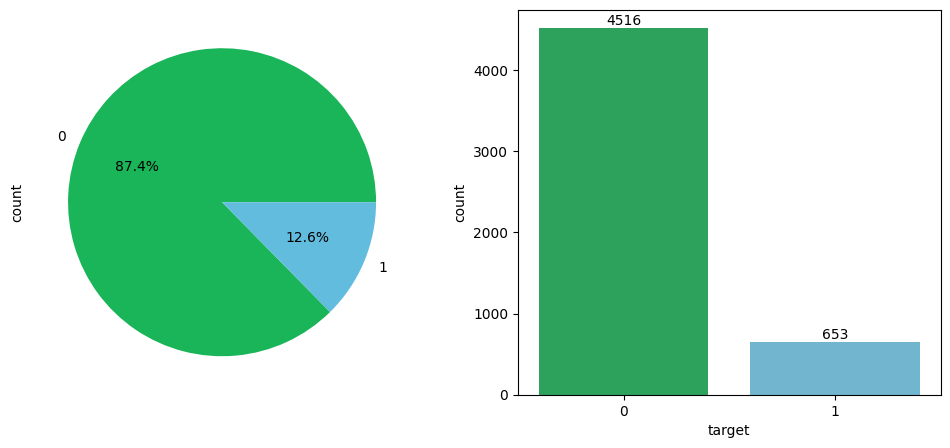

In [98]:
# ploting target column
figure, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

custom_colors = ["#19b558", "#62bcde"]
df["target"].value_counts().plot(kind="pie", autopct="%.1f%%", colors = custom_colors, ax=ax1)
fig = sns.countplot(x=df["target"], palette=custom_colors, ax=ax2)
for bar in fig.containers:
    fig.bar_label(bar)

plt.show()

In [99]:
# number of characters
df["num_characters"] = df["text"].apply(len)

In [100]:
# number of words
df["num_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))
# # number of words
# import nltk
# nltk.download('punkt')
# df["num_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [101]:
#numnber of sentences
df["num_sen"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [102]:
df

,target,text,num_characters,num_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [104]:
df[["num_characters","num_words","num_sen"]].describe()


,num_characters,num_words,num_sen
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [44]:
print(df[["num_characters", "num_words", "num_sen"]].head())
print(df[["num_characters", "num_words", "num_sen"]].dtypes)


   num_characters  num_words  num_sen
0             111         24        2
1              29          8        2
2             155         37        2
3              49         13        1
4              61         15        1
num_characters    int64
num_words         int64
num_sen           int64
dtype: object


In [47]:
# Check if any or all of these columns have only NaN values
print(df[["num_characters", "num_words", "num_sen"]].isna().all())


num_characters    False
num_words         False
num_sen           False
dtype: bool


In [105]:
print(df[df["target"] == 0][["num_characters", "num_words", "num_sen"]].describe())


       num_characters    num_words      num_sen
count     4516.000000  4516.000000  4516.000000
mean        70.459256    17.123782     1.820195
std         56.358207    13.493970     1.383657
min          2.000000     1.000000     1.000000
25%         34.000000     8.000000     1.000000
50%         52.000000    13.000000     1.000000
75%         90.000000    22.000000     2.000000
max        910.000000   220.000000    38.000000


In [106]:
#ham eamils/message
print(df[df["target"] == 1][["num_characters", "num_words", "num_sen"]].describe())


       num_characters   num_words     num_sen
count      653.000000  653.000000  653.000000
mean       137.891271   27.667688    2.970904
std         30.137753    7.008418    1.488425
min         13.000000    2.000000    1.000000
25%        132.000000   25.000000    2.000000
50%        149.000000   29.000000    3.000000
75%        157.000000   32.000000    4.000000
max        224.000000   46.000000    9.000000


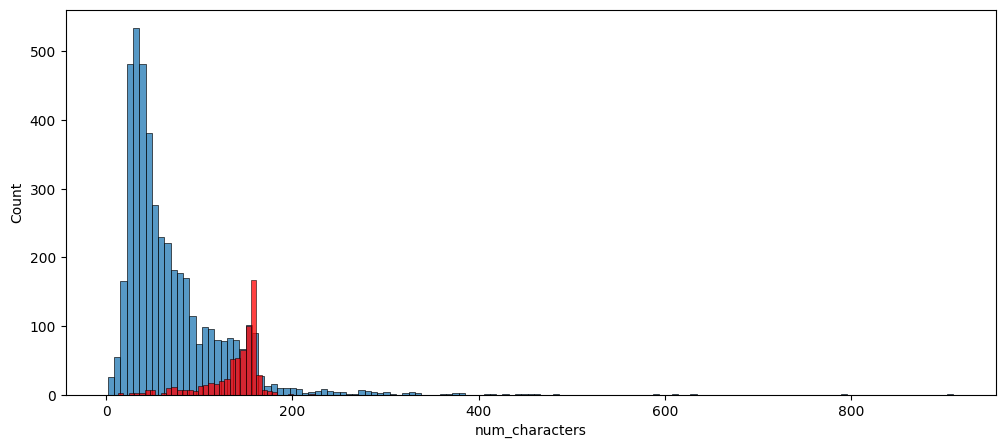

In [107]:
#plotting : number of charactersin spam and ham emails
plt.figure(figsize=(12,5))
sns.histplot(df[df["target"]==0]["num_characters"])
sns.histplot(df[df["target"]==1]["num_characters"],color="red")
plt.show()


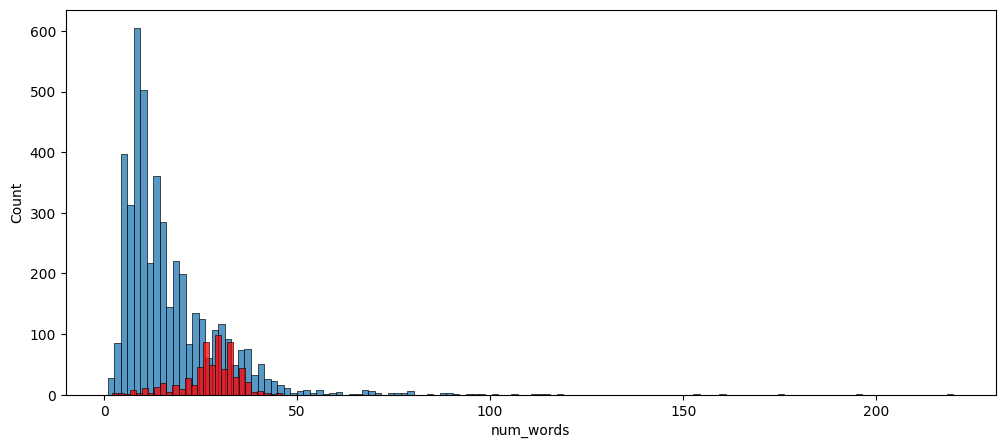

In [108]:
#plo
plt.figure(figsize=(12,5))
sns.histplot(df[df["target"]==0]["num_words"])
sns.histplot(df[df["target"]==1]["num_words"],color="red")
plt.show()

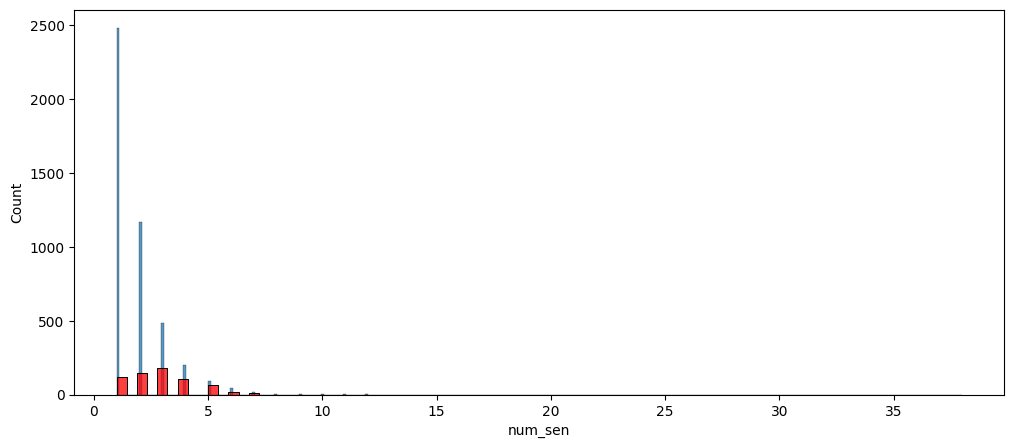

In [109]:
plt.figure(figsize=(12,5))
sns.histplot(df[df["target"]==0]["num_sen"])
sns.histplot(df[df["target"]==1]["num_sen"],color="red")
plt.show()

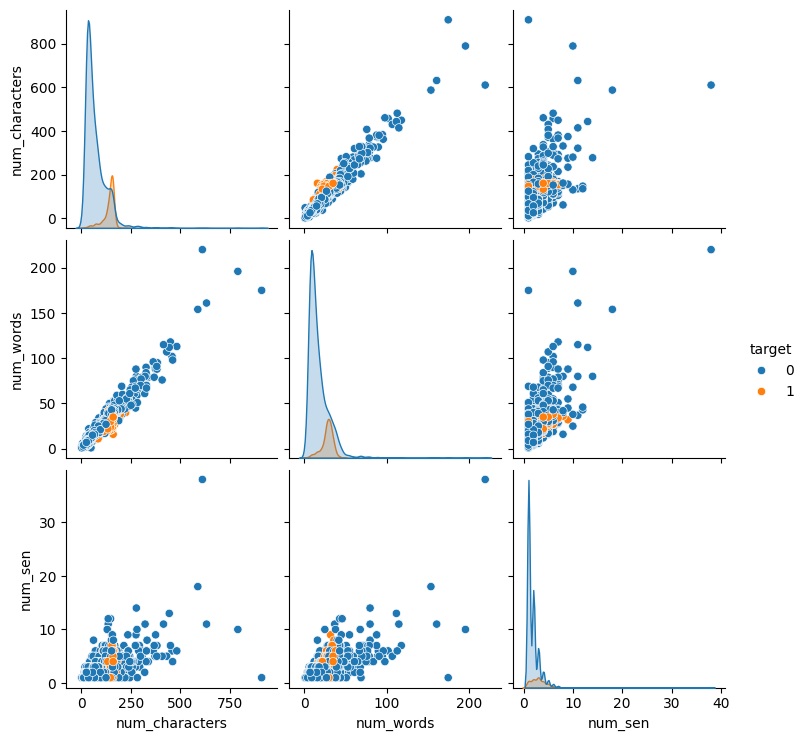

In [110]:
#ploting pairplot to see relationship between new columns
sns.pairplot(df,hue="target")

<Axes: >

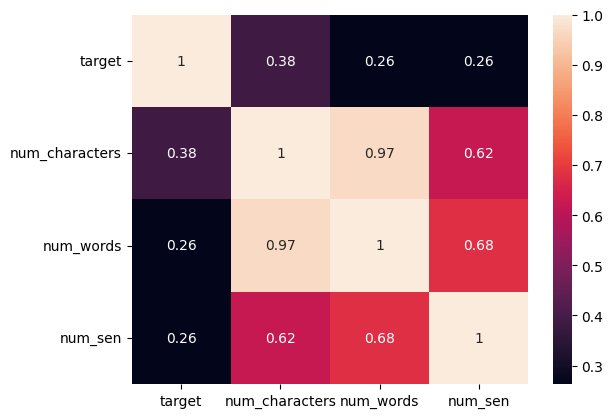

In [111]:
#correaltion heatmap
sns.heatmap(df.select_dtypes(["int"]).corr(),annot=True)

In [118]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yash\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [119]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
def transform_text(text):
    # 01 : transforming text into lower case
    text = text.lower()
    text = nltk.word_tokenize(text)

    # 2 : getting alphanumeric content from text
    y=[]
    for word in text:
        if word.isalnum():
            y.append(word)

    # 3 : removing stop words and punction marks from text
    text = y[:]
    y.clear()
    for word in text:
        if word not in stopwords.words("english") and word not in string.punctuation:
            y.append(word)

    # 4 : appply steaming
    text = y[:]
    y.clear()
    for word in text:
        y.append(PorterStemmer().stem(word))


    return " ".join(y)

In [120]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
transform_text("ALi is goods goods how where boy's# ;$# ... >>(a)// !")

'ali good good boy'

In [121]:
df["transformed_text"] = df['text'].apply(transform_text)

In [122]:
df

,target,text,num_characters,num_words,num_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [124]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/bf/a0/b8fa5f2d7147a7675e2cab99108f7d8d524b67481f81f289cdb2b64ed1ab/wordcloud-1.9.3-cp312-cp312-win_amd64.whl.metadata
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 262.6 kB/s eta 0:00:02
   --------- ----------------------------- 71.7/301.4 kB 435.7 kB/s eta 0:00:01
   ------------------------------------ --- 276.5/301.4 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [125]:
# Performing analysis on ham and spam emails separately to see common and repeating words through Word Cloud
from wordcloud import WordCloud

wc = WordCloud(width=600, height=500, min_font_size=12, background_color="white")

In [127]:
#for ham emails/messages
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

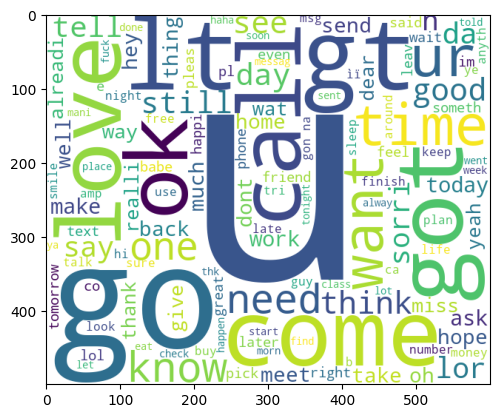

In [128]:
plt.imshow(ham_wc)

In [129]:
#for spam emails/messages
spam_wc = wc.generate(df[df["target"]==1]['transformed_text'].str.cat(sep=' '))  #converting the

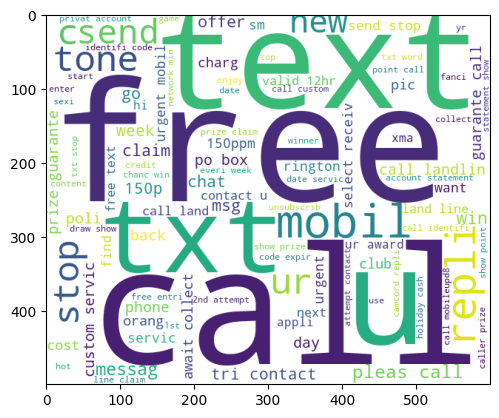

In [130]:
plt.imshow(spam_wc)

In [131]:
#ploting the repeting word
from collections import Counter

In [134]:
def top_words(target):
    words = []
    for msg in df[df['target']==target]["transformed_text"].tolist():
        for word in msg.split():
            words.append(word)
    sns.barplot(x = pd.DataFrame(Counter(words).most_common(30))[0],y=pd.DataFrame(Counter(words).most_common(30))[1])
    plt.xticks(rotation = "vertical")
    plt.xlabel("words")
    plt.ylabel("Frequncy")
    plt.show()

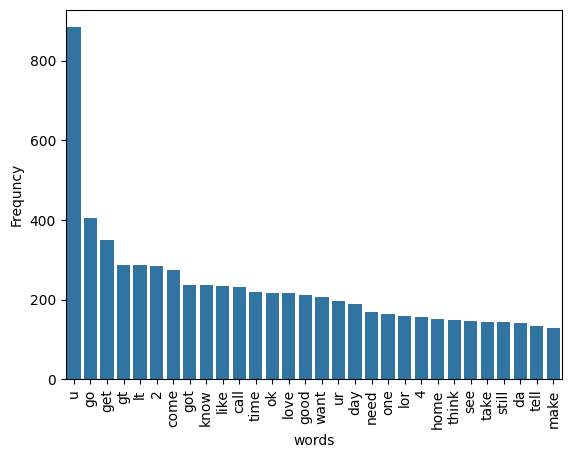

In [135]:
top_words(0)

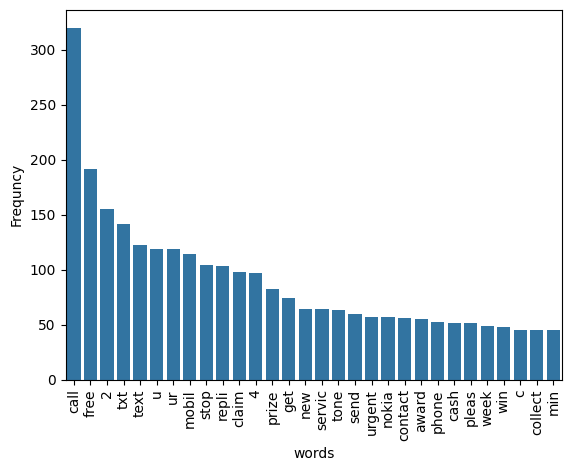

In [136]:
top_words(1)

In [137]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [138]:
#using TF-IDF vectorizer
tf_idf = TfidfVectorizer(max_features=3500)

In [139]:
x = tf_idf.fit_transform(df["transformed_text"]).toarray()

In [140]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [141]:
y = df["target"].values


In [142]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [143]:
x.shape,y.shape

((5169, 3500), (5169,))

In [144]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [145]:
#importing algorithem
from sklearn.naive_bayes import  GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import  accuracy_score,confusion_matrix,precision_score

In [148]:
for model in [GaussianNB(),MultinomialNB(),BernoulliNB()]:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f"{model}")
    print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")
    print(f"Precision Score: {precision_score(y_test,y_pred)}")
    print(f"Confusion Matrix : \n{confusion_matrix(y_test, y_pred)}")
    # print("\n===================\n")

GaussianNB()
Accuracy Score: 0.8713733075435203
Precision Score: 0.5336134453781513
Confusion Matrix : 
[[774 111]
 [ 22 127]]
MultinomialNB()
Accuracy Score: 0.9642166344294004
Precision Score: 1.0
Confusion Matrix : 
[[885   0]
 [ 37 112]]
BernoulliNB()
Accuracy Score: 0.9748549323017408
Precision Score: 1.0
Confusion Matrix : 
[[885   0]
 [ 26 123]]


In [150]:
#test selected model accuracy
model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9642166344294004
1.0


In [151]:
# uncomment the following code for pickling files


import pickle
pickle.dump(tf_idf, open("vectorizer.pkl", "wb"))
pickle.dump(model, open("model.pkl", "wb"))